

## **COMP6685 Deep Learning Coursework A1**
**ID: gk329**<br>
**Name: Gayathri Kumar**


Individual (50% of total mark)


**TASK:**	You are required to develop a phyton code with appropriate comments and answer questions.

**Description**: Create a code using this temlate to train a Convolutional Neural Network (CNN) on the fashion MNIST dataset available at https://keras.io/api/datasets/fashion_mnist/ . 

Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The dataset should be imported in the code and one sample image should be visualised before applying the model.

Define a CNN and comment the chosen parameters of the network. Apply a regularization method (L1, L2 or L1L2). Divide the dataset into training, validation and test set. Obtain the accuracy on the validation set and plot the final results using the data from the test set. Comment your lines of code appropriately to explain your solution.

Enhance the model's performance to obtain the best or optimal validation accuracy. Further questions about final remarks on the results will be answered on the markdown defined in the template.

---
---

Note: This is only a template. You can add more code/text cells if necessary.

Import the dataset and divide it appropriately into sets for cross-validation. **(10 marks)**

---

In [27]:
"""Imports and splits the fashion mnist dataset into train and test datasets for cross validation using 
TensorFlow library"""

import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

*your answer here*

Visualise a random sample image of the dataset. **(5 marks)**

---



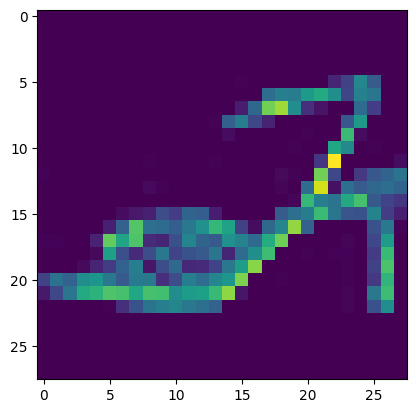

In [28]:
# Visualises a random sample(decided through random.randint) of x_train through matplotlib
import matplotlib.pyplot as plt
import random

rnd_ind = random.randint(0,len(x_train)-1)
plt.imshow(x_train[rnd_ind])

Define your CNN model. Specify the network and training parameters and comment them. **(10 marks)**

---

In [32]:
# Define the CNN model
def create_cnn_model(regularization=0):
    model = tf.keras.models.Sequential()

    # check if regularization needed
    kernel_regularizer = None
    if regularization == 1:
        kernel_regularizer = tf.keras.regularizers.l2(0.01)

    """ Adding Convolutional layers: 
    1. 32 output filters, a 3x3 kernel size, and ReLU activation function, input shape is 28x28x3 - 3 channels for RGB
    2. 64 output filters, a 3x3 kernel size, and ReLU activation function
    """

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=kernel_regularizer))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=kernel_regularizer))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=kernel_regularizer))    

    # Max Pooling layer 2x2 size
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    
    # Flatten the output to pass into denser layers
    model.add(tf.keras.layers.Flatten())
    
    """ Adding denser layers(with/without l2 regularization):
    1. 64 units with relu activation
    2. 10 units with softmax activation
    """
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=kernel_regularizer))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    #Compile the model: with optimiser adam, loss function sparse_categorical_crossentropy and metrics accuracy
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    return model

Train the CNN model using k-fold cross-validation. **(10 marks)**

---

In [33]:
from sklearn.model_selection import StratifiedKFold,train_test_split

#Reshaping datasets to be compatible
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

n_folds = 5

# Initialize StratifiedKFold: number of folds 5, shuffle enabled and random state 42
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

#Split the training datasets to get validation datasets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Store trained models in each fold
model_list = []

# K Fold training
for i in range(2):
    if i==0:
        print("Training without regularization")
    else:
        print("Training with regularization")
    for j in range(n_folds):
        print("Fold - ",j+1)
        model = create_cnn_model(i)
        training_model = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
        model_list.append(model)

Training without regularization
Fold -  1
Epoch 1/5
1200/1200 [==============================] - 39s 32ms/step - loss: 0.5495 - accuracy: 0.8248 - val_loss: 0.3540 - val_accuracy: 0.8746
Epoch 2/5
1200/1200 [==============================] - 40s 33ms/step - loss: 0.3355 - accuracy: 0.8789 - val_loss: 0.3180 - val_accuracy: 0.8835
Epoch 3/5
1200/1200 [==============================] - 46s 39ms/step - loss: 0.2903 - accuracy: 0.8938 - val_loss: 0.2890 - val_accuracy: 0.8980
Epoch 4/5
1200/1200 [==============================] - 48s 40ms/step - loss: 0.2603 - accuracy: 0.9047 - val_loss: 0.3136 - val_accuracy: 0.8877
Epoch 5/5
1200/1200 [==============================] - 46s 38ms/step - loss: 0.2361 - accuracy: 0.9122 - val_loss: 0.2758 - val_accuracy: 0.9011
Fold -  2
Epoch 1/5
1200/1200 [==============================] - 48s 39ms/step - loss: 0.6112 - accuracy: 0.8140 - val_loss: 0.3682 - val_accuracy: 0.8665
Epoch 2/5
1200/1200 [==============================] - 47s 39ms/step - loss: 0

Evaluate your model in cross-validation. Calculate and print the loss and accuracy scores in each fold. Print the average cross-validation accuracy and loss your network achieved (in all folds). **(15 marks)**


In [34]:
#function to calculate the performance metrics
import numpy as np
def calculate_performance(model_list, x_eval, y_eval):
    i=1
    losses_list =[]
    accuracy_list = []
    for model in model_list:
        print("For fold - ", i)
        loss, accuracy = model.evaluate(x_eval, y_eval)
        print("Loss: ",loss)
        print("Accuracy: ",accuracy)
        losses_list.append(loss)
        accuracy_list.append(accuracy)
        
        # Make predictions on the test set
        predictions_reg = np.argmax(model.predict(x_eval), axis=1)
        
        # Create a confusion matrix to visualize the results
        confusion_matrix_reg = tf.math.confusion_matrix(y_eval, predictions_reg)
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(confusion_matrix_reg, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()
        
        i+=1
    
    print("Average Cross Validation Loss(%): ",np.round(np.mean(losses_list),4)*100)
    print("Average Cross Validation Accuracy(%): ",np.round(np.mean(accuracy_list),4)*100)

On validation data
Without regularization
For fold -  1
300/300 [==============================] - 2s 7ms/step - loss: 0.2758 - accuracy: 0.9011
Loss:  0.27577605843544006
Accuracy:  0.9011458158493042
300/300 [==============================] - 2s 7ms/step


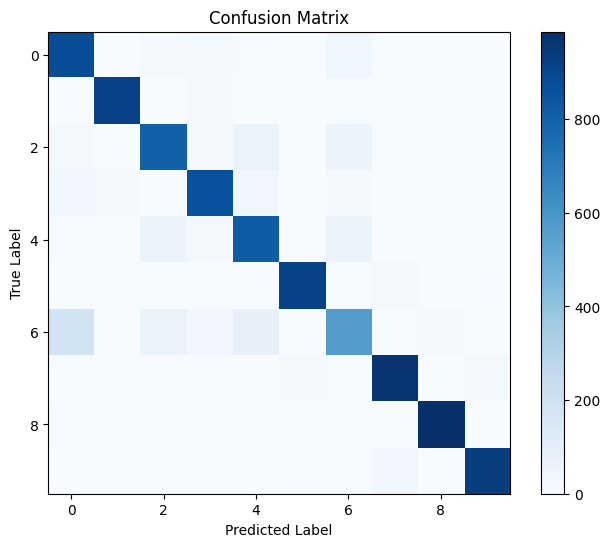

For fold -  2
300/300 [==============================] - 2s 7ms/step - loss: 0.2715 - accuracy: 0.9017
Loss:  0.2714655101299286
Accuracy:  0.9016666412353516
300/300 [==============================] - 2s 7ms/step


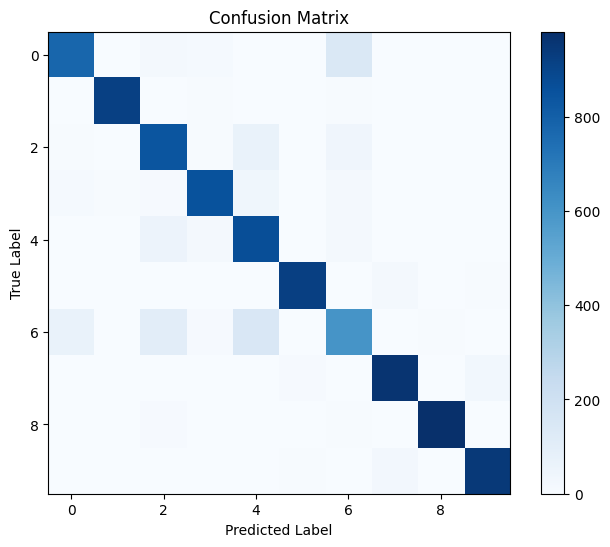

For fold -  3
300/300 [==============================] - 2s 7ms/step - loss: 0.2886 - accuracy: 0.8998
Loss:  0.28862181305885315
Accuracy:  0.8997916579246521
300/300 [==============================] - 2s 7ms/step


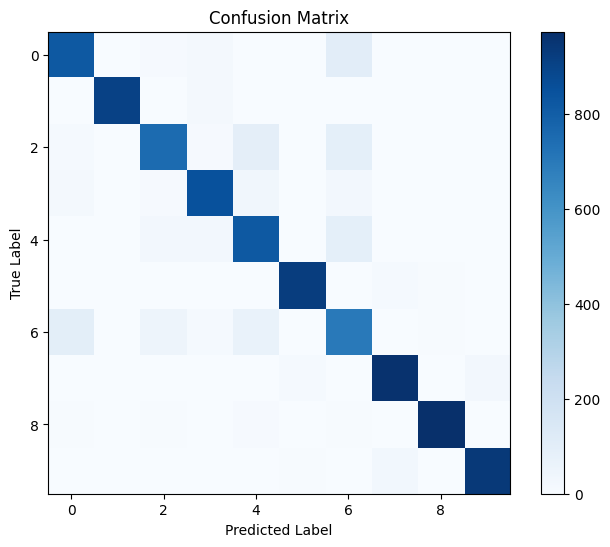

For fold -  4
300/300 [==============================] - 2s 7ms/step - loss: 0.2825 - accuracy: 0.8980
Loss:  0.2824587821960449
Accuracy:  0.8980208039283752
300/300 [==============================] - 2s 7ms/step


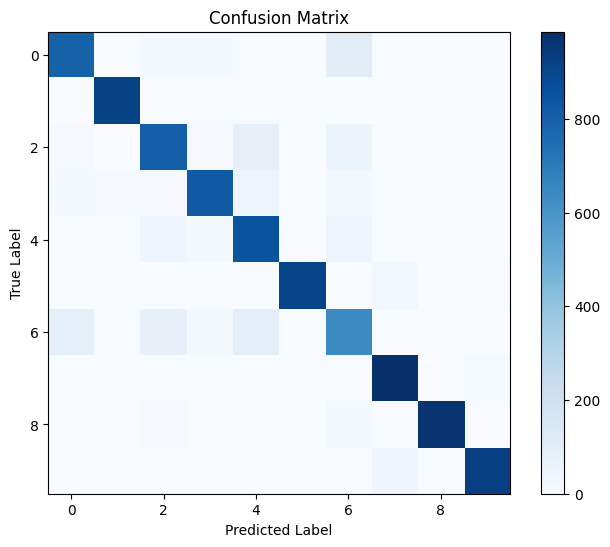

For fold -  5
300/300 [==============================] - 2s 7ms/step - loss: 0.2904 - accuracy: 0.8964
Loss:  0.290355384349823
Accuracy:  0.8963541388511658
300/300 [==============================] - 2s 7ms/step


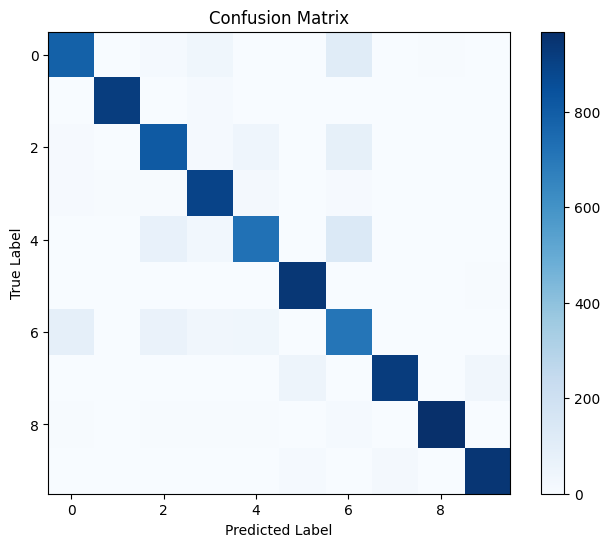

Average Cross Validation Loss(%):  28.17
Average Cross Validation Accuracy(%):  89.94
With regularization
For fold -  1
300/300 [==============================] - 2s 7ms/step - loss: 0.4467 - accuracy: 0.8860
Loss:  0.44668152928352356
Accuracy:  0.8860416412353516
300/300 [==============================] - 2s 7ms/step


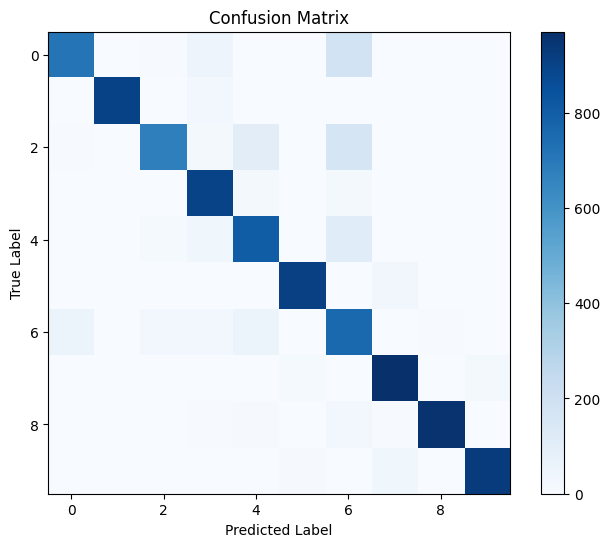

For fold -  2
300/300 [==============================] - 2s 7ms/step - loss: 0.4662 - accuracy: 0.8791
Loss:  0.4661649167537689
Accuracy:  0.8790624737739563
300/300 [==============================] - 2s 7ms/step


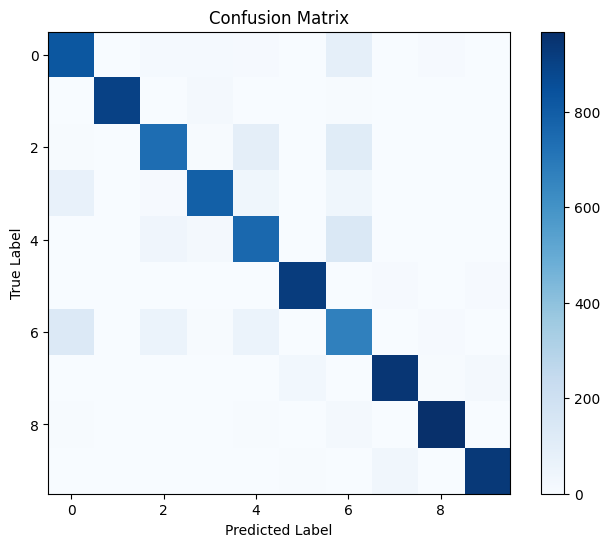

For fold -  3
300/300 [==============================] - 3s 9ms/step - loss: 0.4567 - accuracy: 0.8785
Loss:  0.45673608779907227
Accuracy:  0.8785416483879089
300/300 [==============================] - 2s 7ms/step


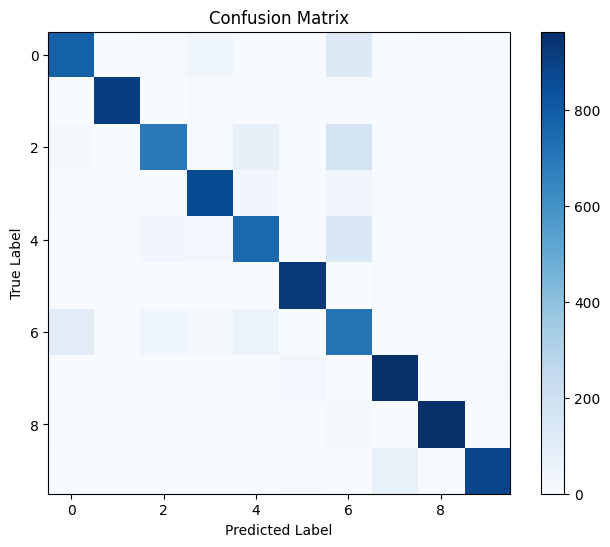

For fold -  4
300/300 [==============================] - 2s 8ms/step - loss: 0.4525 - accuracy: 0.8842
Loss:  0.4524819850921631
Accuracy:  0.8841666579246521
300/300 [==============================] - 2s 7ms/step


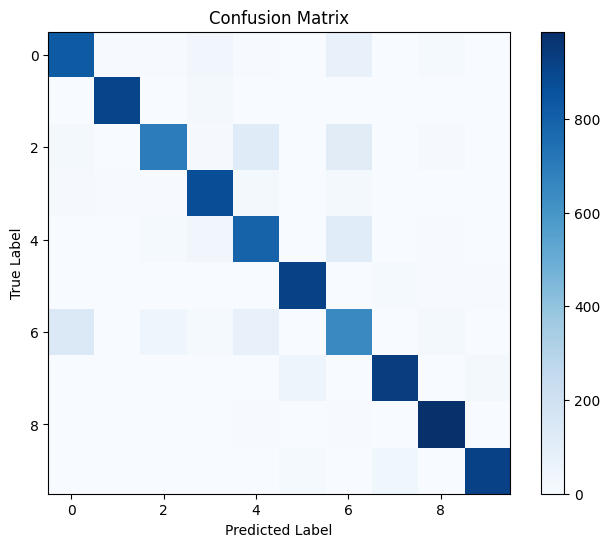

For fold -  5
300/300 [==============================] - 2s 8ms/step - loss: 0.4406 - accuracy: 0.8900
Loss:  0.44055745005607605
Accuracy:  0.8899999856948853
300/300 [==============================] - 2s 7ms/step


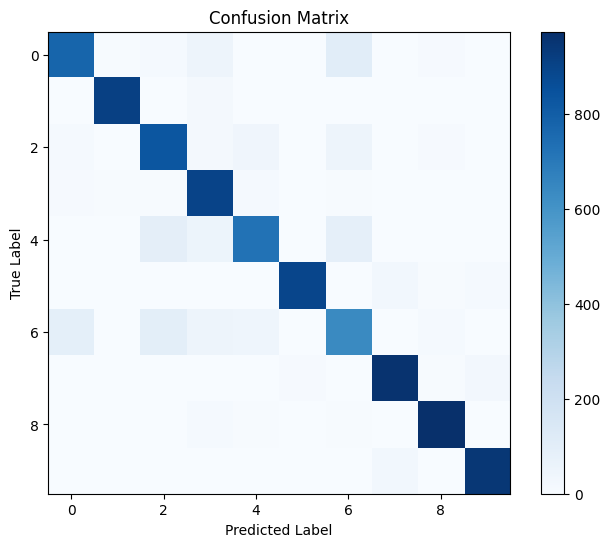

Average Cross Validation Loss(%):  45.25
Average Cross Validation Accuracy(%):  88.36


In [35]:
# Evaluate the model on the validation set
print("On validation data")
print("Without regularization")
calculate_performance(model_list[:n_folds], x_val, y_val)
print("With regularization")
calculate_performance(model_list[n_folds:], x_val, y_val)

*your answer here*

Plot the final results (accuracy/loss) on the test set in each fold. **(10 marks)**

---

On Test data
Without regularization
For fold -  1
313/313 [==============================] - 3s 8ms/step - loss: 0.3093 - accuracy: 0.8922
Loss:  0.30930113792419434
Accuracy:  0.8921999931335449
313/313 [==============================] - 2s 7ms/step


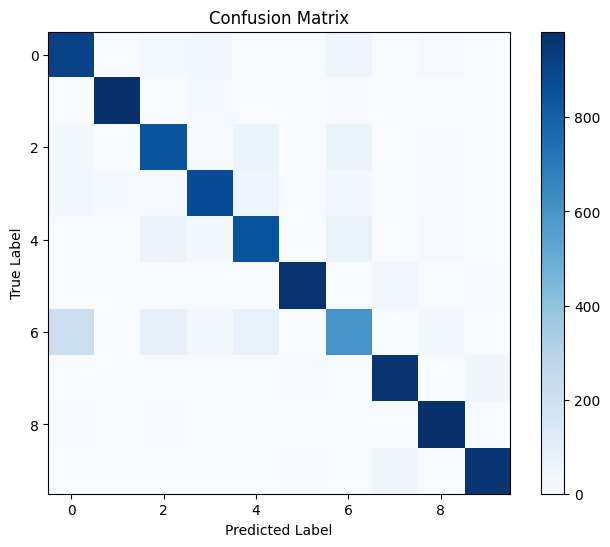

For fold -  2
313/313 [==============================] - 3s 7ms/step - loss: 0.3044 - accuracy: 0.8907
Loss:  0.30440905690193176
Accuracy:  0.8906999826431274
313/313 [==============================] - 2s 7ms/step


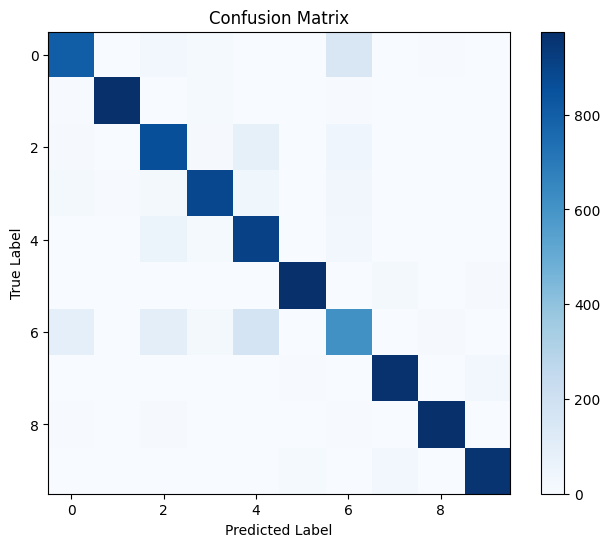

For fold -  3
313/313 [==============================] - 3s 7ms/step - loss: 0.3083 - accuracy: 0.8910
Loss:  0.3082887828350067
Accuracy:  0.890999972820282
313/313 [==============================] - 2s 7ms/step


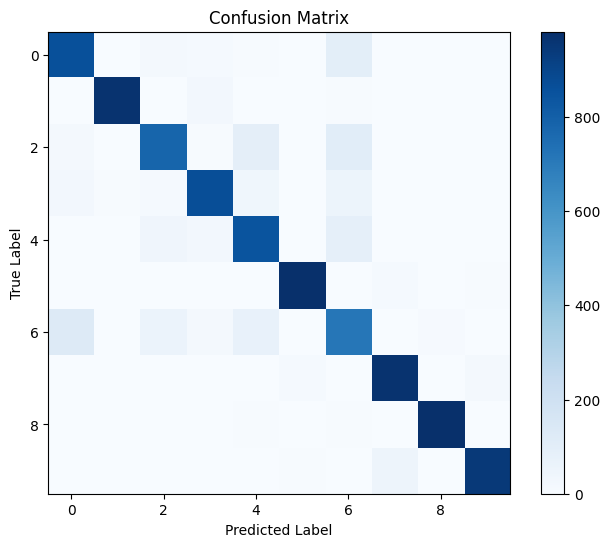

For fold -  4
313/313 [==============================] - 2s 7ms/step - loss: 0.3140 - accuracy: 0.8859
Loss:  0.31403809785842896
Accuracy:  0.8859000205993652
313/313 [==============================] - 2s 7ms/step


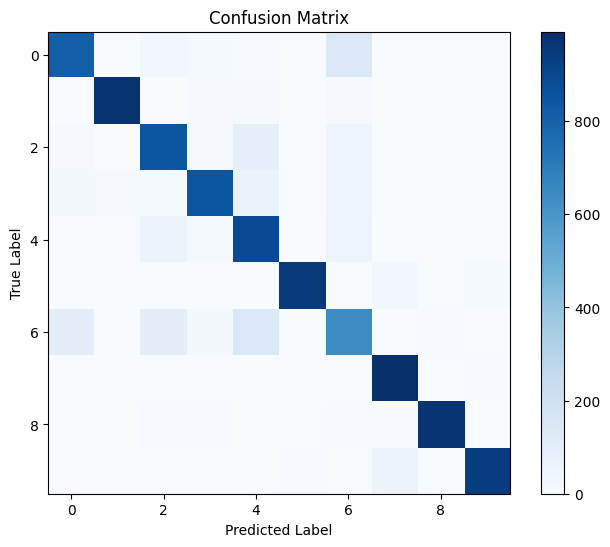

For fold -  5
313/313 [==============================] - 3s 7ms/step - loss: 0.3250 - accuracy: 0.8859
Loss:  0.3250481188297272
Accuracy:  0.8859000205993652
313/313 [==============================] - 2s 7ms/step


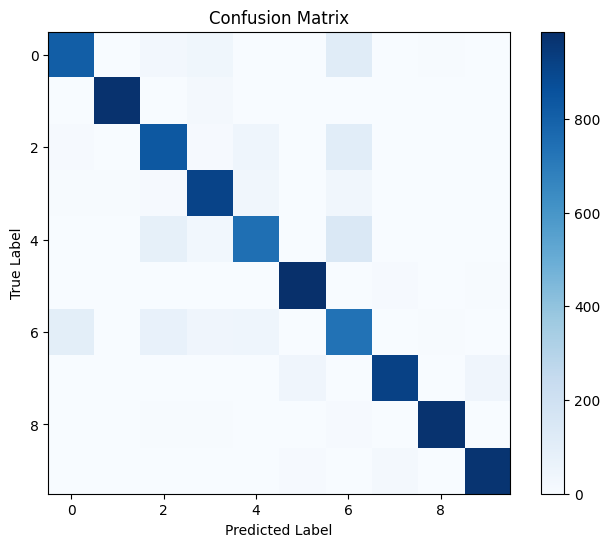

Average Cross Validation Loss(%):  31.22
Average Cross Validation Accuracy(%):  88.91
Without regularization
For fold -  1
313/313 [==============================] - 3s 7ms/step - loss: 0.4723 - accuracy: 0.8767
Loss:  0.47232240438461304
Accuracy:  0.8766999840736389
313/313 [==============================] - 2s 7ms/step


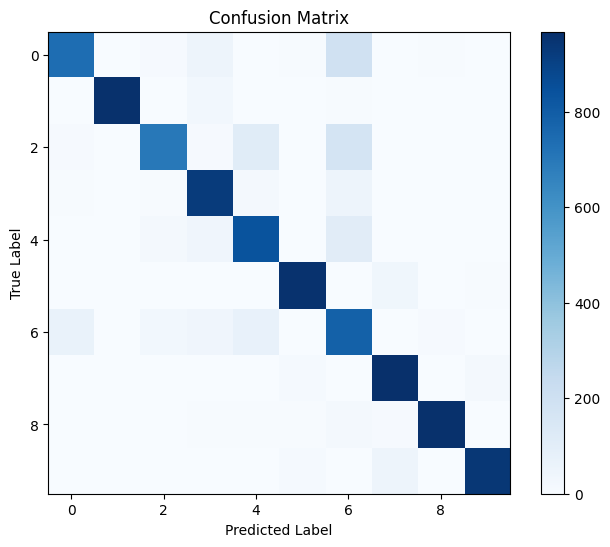

For fold -  2
313/313 [==============================] - 3s 7ms/step - loss: 0.4928 - accuracy: 0.8684
Loss:  0.4928034245967865
Accuracy:  0.868399977684021
313/313 [==============================] - 2s 7ms/step


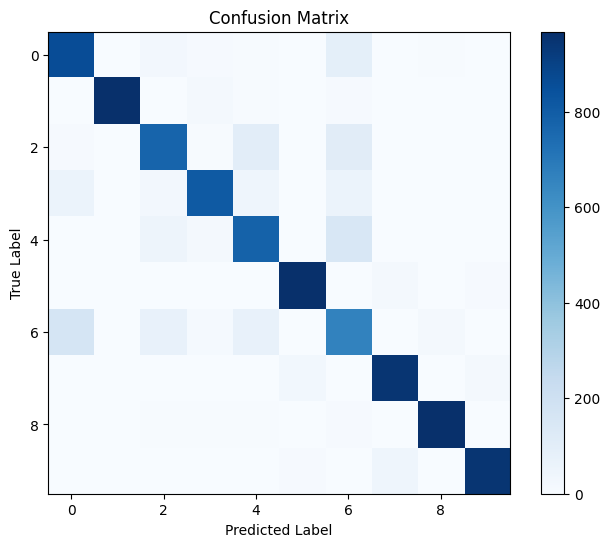

For fold -  3
313/313 [==============================] - 3s 7ms/step - loss: 0.4829 - accuracy: 0.8668
Loss:  0.4828886091709137
Accuracy:  0.8668000102043152
313/313 [==============================] - 2s 7ms/step


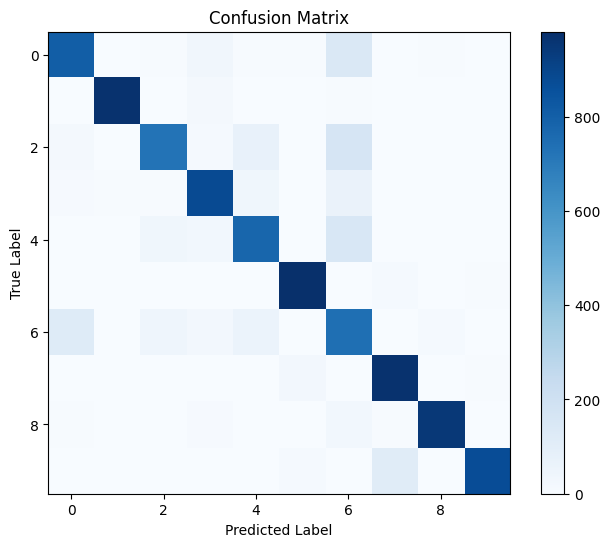

For fold -  4
313/313 [==============================] - 3s 8ms/step - loss: 0.4816 - accuracy: 0.8746
Loss:  0.4815923273563385
Accuracy:  0.8745999932289124
313/313 [==============================] - 2s 7ms/step


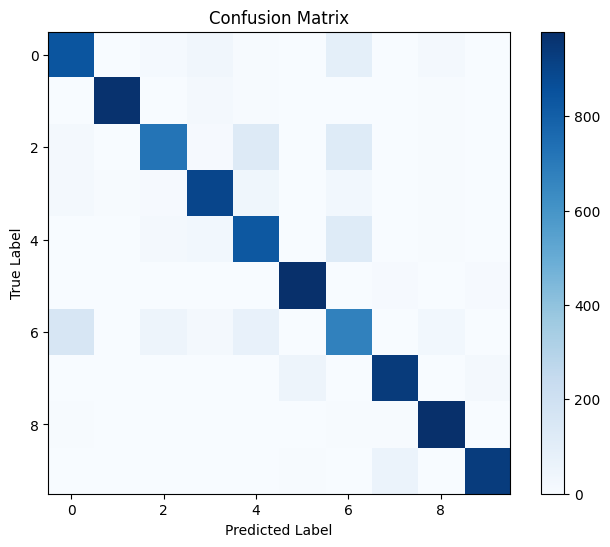

For fold -  5
313/313 [==============================] - 3s 8ms/step - loss: 0.4607 - accuracy: 0.8802
Loss:  0.4606514275074005
Accuracy:  0.8802000284194946
313/313 [==============================] - 2s 7ms/step


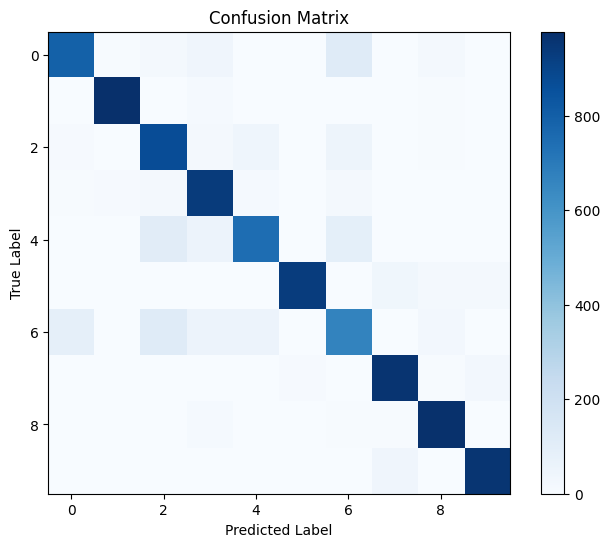

Average Cross Validation Loss(%):  47.81
Average Cross Validation Accuracy(%):  87.33


In [36]:
# Evaluate the model on the test set
print("On Test data")
print("Without regularization")
calculate_performance(model_list[:n_folds], x_test, y_test)
print("Without regularization")
calculate_performance(model_list[n_folds:], x_test, y_test)

Additional questions:


*   Describe whether you found any differences in the network’s accuracy when applying regularisation compared to not applying it. If there were differences, which regularisation did you use? If no differences were found, what could be the reason? **(10 marks)**

Without L2 regularization<br>
For validation dataset<br>
Average Cross Validation Loss(%):  28.17<br>
Average Cross Validation Accuracy(%):  89.9<br><br>
With L2 regularization<br>
For validation dataset<br>
Average Cross Validation Loss(%):  45.25<br>
Average Cross Validation Accuracy(%):  88.36<br><br>
Without L2 regularization<br>
For Test dataset<br>
Average Cross Validation Loss(%):  47.81<br>
Average Cross Validation Accuracy(%):  87.33<br><br>
With L2 regularization<br>
For Test dataset<br>
Average Cross Validation Loss(%):  28.17<br>
Average Cross Validation Accuracy(%):  89.94<br><br>

From the above results, it is observed that when tested against the validation dataset the model performs better without regularization, and for the given test dataset, it improved with L2 regularization.
*

*   Write your conclusions about the results achieved with your model on the fashion MNIST dataset and ideas to improve these results/performance further. **(10 marks)**
<br><br>Regularization helps improve the performance of the model as it reduces overfitting. Usage of a confusion matrix to plot the results helps us understand where the model is facing limitations. Also measuring accuracies of validation and test data shows how well the model works against unseen data and this is even more evident with the test data.<br><br>

This model can be improved in many different ways:-<br>
- Hyperparameter tuning
- Trying different architectures of the CNN by adding/removing layers and adjusting different parameters
- Batch normalization
- Trying different optimizers
- Applying data augmentation

---



Additional remarks:

*   Code outline appropriately commented. **(10 marks)**
*   Code running without errors. **(10 marks)**

---

